# **HW1: Regression**
In *assignment 1*, you need to finish:

1.  Basic Part: Implement two regression models to predict the Systolic blood pressure (SBP) of a patient. You will need to implement **both Matrix Inversion and Gradient Descent**.


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implement one regression model to predict the SBP of multiple patients in a different way than the basic part. You can choose **either** of the two methods for this part.

# **1. Basic Part (55%)**
In the first part, you need to implement the regression to predict SBP from the given DBP


## 1.1 Matrix Inversion Method (25%)


*   Save the prediction result in a csv file **hw1_basic_mi.csv**
*   Print your coefficient


### *Import Packages*

> Note: You **cannot** import any other package

In [2102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

### *Global attributes*
Define the global attributes

In [2103]:
training_dataroot = 'hw1_basic_training.csv' # Training data file file named as 'hw1_basic_training.csv'
testing_dataroot = 'hw1_basic_testing.csv'   # Testing data file named as 'hw1_basic_training.csv'
output_dataroot = 'hw1_basic_mi.csv' # Output file will be named as 'hw1_basic.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be 20 * 1 matrix and saved as numpy array
                      # The format of each row should be ['sbp']

You can add your own global attributes here


In [2104]:
def MAPE(y_ans, y_prediction):
    return np.mean(np.abs((y_ans - y_prediction) / y_ans)) * 100

### *Load the Input File*
First, load the basic input file **hw1_basic_training.csv** and **hw1_basic_testing.csv**

Input data would be stored in *training_datalist* and *testing_datalist*

In [2105]:
# Read input csv to datalist
with open(training_dataroot, newline='') as csvfile:
    training_datalist = np.array(list(csv.reader(csvfile)))
    training_datalist = np.delete(training_datalist, 0, 0)

with open(testing_dataroot, newline='') as csvfile:
    testing_datalist = np.array(list(csv.reader(csvfile)))
    testing_datalist = np.delete(testing_datalist, 0, 0)

### *Implement the Regression Model*

> Note: It is recommended to use the functions we defined, you can also define your own functions


#### Step 1: Split Data
Split data in *training_datalist* into training dataset and validation dataset
* Validation dataset is used to validate your own model without the testing data



In [2106]:
def split_data(training_datalist: np.array) -> (np.array, np.array):
    train_nums = int(len(training_datalist) * 0.8)
    return training_datalist[ : train_nums], training_datalist[train_nums : ]

#### Step 2: Preprocess Data
Handle the unreasonable data
> Hint: Outlier and missing data can be handled by removing the data or adding the values with the help of statistics  

In [2107]:
def preprocess_data(training_datalist: np.array, boundary: int) -> np.array:
    train_nums = len(training_datalist)

    dbp = np.array([[data[0]] for data in training_datalist]).astype(float)
    sbp = np.array([[data[1]] for data in training_datalist]).astype(float)

    dbp_mean = np.mean(dbp)
    dbp_std = np.std(dbp)
    sbp_mean = np.mean(sbp)
    sbp_std = np.std(sbp)

    i = -1
    while i < train_nums - 1:
        i += 1

        dbp_below_threshold = dbp[i] < dbp_mean - boundary * dbp_std
        dbp_above_threshold = dbp[i] > dbp_mean + boundary * dbp_std
        sbp_below_threshold = sbp[i] < sbp_mean - boundary * sbp_std
        sbp_above_threshold = sbp[i] > sbp_mean + boundary * sbp_std

        if (dbp_below_threshold or dbp_above_threshold) or (sbp_below_threshold or sbp_above_threshold):
            training_datalist = np.delete(training_datalist, i, 0)
            train_nums -= 1
            i -= 1

    return training_datalist.astype(float)

#### Step 3: Implement Regression
> use Matrix Inversion to finish this part




In [2108]:
def matrix_inversion(train_set: np.array) -> np.array:
    x = np.array([[1, data[0]] for data in train_set]).astype(float)
    y_ans = np.array([[data[1]] for data in train_set]).astype(float)
    return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y_ans)

def validation(validate_set: np.array, coefficient: np.array) -> str:
    validate_x = np.array([[1, data[0]] for data in validate_set])
    validate_y = np.array([[data[1]] for data in validate_set])
    validate_y_prediction = validate_x.dot(coefficient).astype(int)
    return f'MAPE of validation set : {MAPE(validate_y, validate_y_prediction)}'

#### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*
The final *output_datalist* should look something like this 
> [ [100], [80], ... , [90] ] where each row contains the predicted SBP

In [2109]:
def make_prediction(testing_datalist: np.array, coefficient: np.array) -> np.array:
    testing_x = np.array([[1, data[0]] for data in testing_datalist]).astype(float)
    return testing_x.dot(coefficient).astype(int)

#### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be:
```
3 2 1
```





In [2110]:
train, validate = split_data(preprocess_data(training_datalist, 2))
coefficient = matrix_inversion(train)
output_datalist = make_prediction(testing_datalist, coefficient)

print(validation(validate, coefficient))
print('\n' + '-' * 10 + ' Coefficient ' + '-' * 10)

for coe in coefficient[::-1]:
    print(coe[0], end = ' ')

MAPE of validation set : 5.000690216635821

---------- Coefficient ----------
0.9210072989326239 52.277057839995386 

### *Write the Output File*
Write the prediction to output csv
> Format: 'sbp'




In [2111]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
	writer = csv.writer(csvfile)
	for row in output_datalist:
		writer.writerow(row)

## 1.2 Gradient Descent Method (30%)


*   Save the prediction result in a csv file **hw1_basic_gd.csv**
*   Output your coefficient update in a csv file **hw1_basic_coefficient.csv**
*   Print your coefficient





### *Global attributes*

In [2112]:
output_dataroot = 'hw1_basic_gd.csv' # Output file will be named as 'hw1_basic.csv'
coefficient_output_dataroot = 'hw1_basic_coefficient.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be 20 * 1 matrix and saved as numpy array
                      # The format of each row should be ['sbp']

coefficient_output = [] # Your coefficient update during gradient descent
                   # Should be a (number of iterations * number_of coefficient) matrix
                   # The format of each row should be ['w0', 'w1', ...., 'wn']

Your own global attributes

In [2113]:
# Read input csv to datalist
with open(training_dataroot, newline='') as csvfile:
    training_datalist = np.array(list(csv.reader(csvfile)))
    training_datalist = np.delete(training_datalist, 0, 0)

with open(testing_dataroot, newline='') as csvfile:
    testing_datalist = np.array(list(csv.reader(csvfile)))
    testing_datalist = np.delete(testing_datalist, 0, 0)

### *Implement the Regression Model*


#### Step 1: Split Data

In [2114]:
def split_data(training_datalist: np.array) -> (np.array, np.array):
    train_nums = int(len(training_datalist) * 0.8)
    return training_datalist[ : train_nums], training_datalist[train_nums : ]

#### Step 2: Preprocess Data

In [2115]:
def preprocess_data(training_datalist: np.array, width: float) -> np.array:
    train_nums = len(training_datalist)

    dbp = np.array([[data[0]] for data in training_datalist]).astype(float)
    sbp = np.array([[data[1]] for data in training_datalist]).astype(float)

    dbp_mean = np.mean(dbp)
    dbp_std = np.std(dbp)
    sbp_mean = np.mean(sbp)
    sbp_std = np.std(sbp)

    i = -1
    while i < train_nums - 1:
        i += 1

        dbp_below_threshold = dbp[i] < dbp_mean - width * dbp_std
        dbp_above_threshold = dbp[i] > dbp_mean + width * dbp_std
        sbp_below_threshold = sbp[i] < sbp_mean - width * sbp_std
        sbp_above_threshold = sbp[i] > sbp_mean + width * sbp_std

        if (dbp_below_threshold or dbp_above_threshold) or (sbp_below_threshold or sbp_above_threshold):
            training_datalist = np.delete(training_datalist, i, 0)
            train_nums -= 1
            i -= 1

    return training_datalist.astype(float)

#### Step 3: Implement Regression
> use Gradient Descent to finish this part

In [2116]:
def gradient_descent(epoch: int, learning_rate: float, train_set: np.array) -> np.array:
    def gradient_of_loss(y_ans: np.array, y_predict: np.array, x: np.array) -> np.array: 
        return (-2 * (y_ans - y_predict)).T.dot(x).T
    
    coefficient = np.array([[50], [0.9]]).astype(float)
    x = np.array([[1, data[0]] for data in train_set]).astype(float)
    y_ans = np.array([[data[1]] for data in train_set]).astype(float)
    y_predict = x.dot(coefficient).astype(float)

    for e in range(epoch):
        coefficient -= learning_rate * gradient_of_loss(y_ans, y_predict, x)
        y_predict = x.dot(coefficient)
        coefficient_output.append(coefficient)
        print(f'Epoch {e + 1:2} : MAPE = {MAPE(y_ans, y_predict)}')
    
    return coefficient
    
def validation(validate_set: np.array, coefficient: np.array) -> str:
    validate_x = np.array([[1, data[0]] for data in validate_set])
    validate_y = np.array([[data[1]] for data in validate_set])
    validate_y_prediction = validate_x.dot(coefficient).astype(int)
    return f'MAPE of validation set : {MAPE(validate_y, validate_y_prediction)}'


#### Step 4: Make Prediction

Make prediction of testing dataset and store the values in *output_datalist*
The final *output_datalist* should look something like this 
> [ [100], [80], ... , [90] ] where each row contains the predicted SBP

Remember to also store your coefficient update in *coefficient_output*
The final *coefficient_output* should look something like this
> [ [1, 0, 3, 5], ... , [0.1, 0.3, 0.2, 0.5] ] where each row contains the [w0, w1, ..., wn] of your coefficient





In [2117]:
def make_prediction(testing_datalist: np.array, coefficient: np.array) -> np.array:
    testing_x = np.array([[1, data[0]] for data in testing_datalist]).astype(float)
    return testing_x.dot(coefficient).astype(int)

#### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be:
```
3 2 1
```



In [2118]:
train, validate = split_data(preprocess_data(training_datalist, 2))
coefficient = gradient_descent(200, 0.0000005, train)
output_datalist = make_prediction(testing_datalist, coefficient)

print('\n' + '-' * 10 + ' MAPE ' + '-' * 10)
print(validation(validate, coefficient))
print('\n' + '-' * 10 + ' Coefficient ' + '-' * 10)

for coe in coefficient[::-1]:
    print(coe[0], end = ' ')

Epoch  1 : MAPE = 4.8884711898988344
Epoch  2 : MAPE = 4.92717997279329
Epoch  3 : MAPE = 4.943203113903013
Epoch  4 : MAPE = 4.9476709834159145
Epoch  5 : MAPE = 4.948830525460115
Epoch  6 : MAPE = 4.949120445821383
Epoch  7 : MAPE = 4.94919295082846
Epoch  8 : MAPE = 4.949211099513473
Epoch  9 : MAPE = 4.949215658497023
Epoch 10 : MAPE = 4.949216819899923
Epoch 11 : MAPE = 4.949217131868798
Epoch 12 : MAPE = 4.9492172314694125
Epoch 13 : MAPE = 4.9492172779754835
Epoch 14 : MAPE = 4.949217311207263
Epoch 15 : MAPE = 4.949217341120262
Epoch 16 : MAPE = 4.949217370203477
Epoch 17 : MAPE = 4.949217399079183
Epoch 18 : MAPE = 4.949217427902959
Epoch 19 : MAPE = 4.949217456713698
Epoch 20 : MAPE = 4.949217485521125
Epoch 21 : MAPE = 4.949217514327674
Epoch 22 : MAPE = 4.949217543133948
Epoch 23 : MAPE = 4.9492175719401015
Epoch 24 : MAPE = 4.949217600746173
Epoch 25 : MAPE = 4.949217629552173
Epoch 26 : MAPE = 4.949217658358101
Epoch 27 : MAPE = 4.949217687163961
Epoch 28 : MAPE = 4.94921

### *Write the Output File*

Write the prediction to output csv
> Format: 'sbp'

**Write the coefficient update to csv**
> Format: 'w0', 'w1', ..., 'wn'
>*   The number of columns is based on your number of coefficient
>*   The number of row is based on your number of iterations

In [2119]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
	writer = csv.writer(csvfile)
	for row in output_datalist:
		writer.writerow(row)

with open(coefficient_output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
	writer = csv.writer(csvfile)
	for row in coefficient_output:
		writer.writerow(row.flatten())

# **2. Advanced Part (40%)**
In the second part, you need to implement the regression in a different way than the basic part to help your predictions of multiple patients SBP.

You can choose **either** Matrix Inversion or Gradient Descent method.

The training data will be in **hw1_advanced_training.csv** and the testing data will be in **hw1_advanced_testing.csv**.

Output your prediction in **hw1_advanced.csv**

Notice:
> You cannot import any other package other than those given



### Input the training and testing dataset

In [2120]:
training_dataroot = 'hw1_advanced_training.csv' # Training data file file named as 'hw1_basic_training.csv'
testing_dataroot = 'hw1_advanced_testing.csv'   # Testing data file named as 'hw1_basic_training.csv'
output_dataroot = 'hw1_advanced.csv' # Output file will be named as 'hw1_basic.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be 220 * 1 matrix and saved as numpy array
                      # The format of each row should be ['sbp']

### Your Implementation

#### 1. read the training data

In [2121]:
def read_data() -> (list, list, np.array):
    train_id = []
    train_time = []
    train_data = []

    training_data = []
    with open(training_dataroot, newline='') as csvfile:
        training_data = list(csv.reader(csvfile))[1 : ]

    train_id = [int(data[0]) for data in training_data]

    train_data = np.array([data[2 : ] for data in training_data])
    train_data[train_data == ''] = np.nan
    train_data = train_data.astype(float)

    for data in training_data:
        time_list = data[1].split(' ')
        days_ago = int(time_list[0])

        time = time_list[2].split(':')
        hour, minute = int(time[0]), int(time[1])
        train_time.append([days_ago, hour, minute])

    return train_id, train_time, train_data

#### 2. preprocess the training data

In [2122]:
def remove_incomplete_data(train_id: list, train_time: list, train_data: np.array) -> (list, list, np.array):
    i = 0; train_nums = len(train_data)
    while i < train_nums:
        if np.sum(np.isnan(train_data[i])) >= 2:
            train_data = np.delete(train_data, i, 0)
            train_id.pop(i)
            train_time.pop(i)
            train_nums -= 1
            i -= 1

        if np.isnan(train_data[i][0]):
            train_data[i][0] = train_data[i - 1][0]
        elif np.isnan(train_data[i][1]):
            train_data[i][1] = train_data[i - 1][1]
        elif np.isnan(train_data[i][2]):
            train_data[i][2] = train_data[i - 1][2]
        elif np.isnan(train_data[i][3]):
            train_data[i][3] = train_data[i - 1][3]

        i += 1
    return train_id, train_time, train_data

In [2123]:
def divide_data(train_id: list, train_time: list, train_data: np.array) -> list:
    ## We first divide the data into group by id
    last_id = train_id[0]; group = []; tem_group = []
    for i, data in enumerate(train_id):
        tem_group.append(train_data[i])
        if data != last_id:
            group.append(tem_group)
            tem_group = []
            last_id = data
    group.append(tem_group) # list-list-ndarray

    ## Then we divide the data into group by time
    new_group = []
    for people in group:
        morning, noon, afternoon, evening, night = [], [], [], [], []

        for i in range(len(people)):
            clock = train_time.pop(0)[1]
            
            if clock >= 6 and clock < 10:
                morning.append([*train_data[i]])
            elif clock >= 10 and clock < 14:
                noon.append([*train_data[i]])
            elif clock >= 14 and clock < 18:
                afternoon.append([*train_data[i]])
            elif clock >= 18 and clock < 22:
                evening.append([*train_data[i]])
            else:
                night.append([*train_data[i]])
        new_group.append([morning, noon, afternoon, evening, night])
    return new_group

In [2124]:
def remove_outliers(group: list, width: float) -> list:
    new_group = []

    for people in group:
        new_people = []

        for time in people:
            new_time = []

            temperature = np.array([data[0] for data in time])
            temperature_mean = np.mean(temperature); temperature_std = np.std(temperature)

            heartrate = np.array([data[1] for data in time])
            heartrate_mean = np.mean(heartrate); heartrate_std = np.std(heartrate)

            resprate = np.array([data[2] for data in time])
            resprate_mean = np.mean(resprate); resprate_std = np.std(resprate)

            o2sat = np.array([data[3] for data in time])
            o2sat_mean = np.mean(o2sat); o2sat_std = np.std(o2sat)

            sbp = np.array([data[4] for data in time])
            sbp_mean = np.mean(sbp); sbp_std = np.std(sbp)

            temp_beyond_threshold = np.abs(temperature - temperature_mean) > width * temperature_std
            heartrate_beyond_threshold = np.abs(heartrate - heartrate_mean) > width * heartrate_std
            resprate_beyond_threshold = np.abs(resprate - resprate_mean) > width * resprate_std
            o2sat_beyond_threshold = np.abs(o2sat - o2sat_mean) > width * o2sat_std
            sbp_beyond_threshold = np.abs(sbp - sbp_mean) > width * sbp_std

            for i in range(len(time)):
                if temp_beyond_threshold[i] or heartrate_beyond_threshold[i] or resprate_beyond_threshold[i] or o2sat_beyond_threshold[i] or sbp_beyond_threshold[i]:
                    continue
                new_time.append(time[i])
            new_people.append(time)
        new_group.append(new_people)

    return new_group

In [2125]:
def preprocess(train_id: np.array, train_time: np.array, train_data: np.array, width: float) -> list:
    '''
    Assume the return value called list, then:
        list: Whole data after preprocessing \n
        list[i]: Whole Data of the i-th person \n
        list[i][j]: Whole Data of the i-th person in the j-th time period \n
        list[i][j][k]: k-th Data of the i-th person in the j-th time period \n
        list[i][j][k][0]: Temperature of the k-th data of the i-th person in the j-th time period
    '''
    # remove the data with more than 2 elements missing
    train_id, train_time, train_data = remove_incomplete_data(train_id, train_time, train_data)

    # remove outliers
    ## We first divide the data into group by id and time
    group = divide_data(train_id, train_time, train_data)

    ## Then we remove the data in each group once it has any outlier and return
    return remove_outliers(group, width)

#### 3. train model

In [2126]:
def gradient_descent(y_ans: np.array, y_predict: np.array, x: np.array) -> np.array:
    return (-2 * (y_ans - y_predict)).T.dot(x).T

In [2127]:
def Adam(gradient, coefficient, eta, m_t, v_t, n) -> np.array:
    beta_1 = 0.9; beta_2 = 0.9; epsilon = 1e-7
    m_t = beta_1 * m_t + (1 - beta_1) * gradient
    v_t = beta_2 * v_t + (1 - beta_2) * (gradient ** 2)

    m_hat = m_t / (1 - beta_1 ** n)
    v_hat = v_t / (1 - beta_2 ** n)

    return coefficient - eta * m_hat / (np.sqrt(v_hat) + epsilon)

In [2128]:
def train(train_set: np.array, epoch: int, learning_rate: float, model: np.array) -> np.array:
    '''
    What I want to do: https://chat.openai.com/share/d4fa50cc-43d6-4651-93c7-9f42a8c49a3a
    '''
    eta = learning_rate
    batch_nums = len(train_set)

    plot_epoch = []; plot_train_MAPE = []; plot_validate_MAPE = []

    MAPE_mean = 0
    m_t = np.zeros((len(train_set[0][0]), 1)); v_t = np.zeros((len(train_set[0][0]), 1))
    for e in range(epoch):
        ith_validate = 0

        validate_set = []; clean_train_set = []
        for i ,batch in enumerate(train_set):
            if i % batch_nums == ith_validate:
                validate_set = batch
                continue
            
            for datas in batch:
                x = np.array([[1, *datas[ : -1]]]).astype(float)
                y_ans = np.array([[datas[-1]]]).astype(float)
                y_predict = x.dot(model).astype(int)

                gradient = gradient_descent(y_ans, y_predict, x)
                model = Adam(gradient, model, eta, m_t, v_t, i)

            clean_train_set += batch
            
        validate_x = np.array([[1, *data[ : -1]] for data in validate_set]).astype(float)
        validate_y = np.array([[data[-1]] for data in validate_set]).astype(float)
        validate_y_prediction = validate_x.dot(model).astype(int)
        MAPE_mean += MAPE(validate_y, validate_y_prediction)

        clean_train_x = np.array([[1, *data[ : -1]] for data in clean_train_set]).astype(float)
        clean_train_y = np.array([[data[-1]] for data in clean_train_set]).astype(float)
        clean_train_y_prediction = clean_train_x.dot(model).astype(int)

        plot_epoch.append(e + 1)
        plot_validate_MAPE.append(MAPE(validate_y, validate_y_prediction))
        plot_train_MAPE.append(MAPE(clean_train_y, clean_train_y_prediction))
        
    plt.plot(plot_epoch, plot_train_MAPE, 'blue')
    plt.plot(plot_epoch, plot_validate_MAPE, 'red')
    plt.xlabel('Epoch'); plt.ylabel('MAPE')
    plt.show()

    print(f'MAPE = {MAPE_mean / epoch}')
    return model

In [2129]:
def train_2(datalist, epoch, learning_rate, model):
    # random.shuffle(datalist)
    nums = len(datalist)
    train_set = datalist[ : int(nums * 0.8)]
    validate_set = datalist[int(nums * 0.8) : ]

    eta = learning_rate
    plot_epoch = []; plot_train_MAPE = []; plot_validate_MAPE = []

    m_t = np.zeros((len(train_set[0]), 1)); v_t = np.zeros((len(train_set[0]), 1))
    for i, data in enumerate(train_set):
        x = np.array([[1, *data[ : -1]]]).astype(float)
        y_ans = np.array([[data[-1]]]).astype(float)
        y_predict = x.dot(model).astype(int)

        gradient = gradient_descent(y_ans, y_predict, x)
        model = Adam(gradient, model, eta, m_t, v_t, i + 1)

        plot_epoch.append(i + 1)
        plot_train_MAPE.append(MAPE(y_ans, y_predict))

    validate_x = np.array([[1, *data[ : -1]] for data in validate_set]).astype(float)
    validate_y = np.array([[data[-1]] for data in validate_set]).astype(float)
    validate_y_prediction = validate_x.dot(model).astype(int)
    print(f'MAPE = {MAPE(validate_y, validate_y_prediction)}')

    plt.plot(plot_epoch, plot_train_MAPE, 'blue')
    plt.xlabel('Epoch'); plt.ylabel('MAPE')
    plt.show()

    return model

MAPE = 12.895396788095395


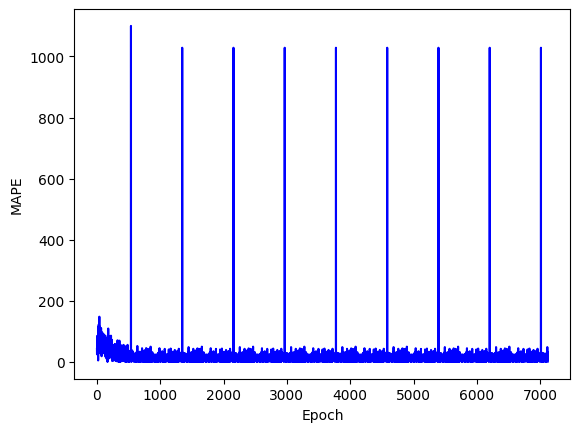

[[24.62673921]
 [ 0.1267392 ]
 [ 0.7767392 ]
 [ 0.1267392 ]
 [ 0.4267392 ]]


In [2130]:
train_set = preprocess(*read_data(), 2)

people_nums = len(train_set)
morning_train_set = [train_set[i][0] for i in range(people_nums)]
noon_train_set = [train_set[i][1] for i in range(people_nums)]
afternoon_train_set = [train_set[i][2] for i in range(people_nums)]
evening_train_set = [train_set[i][3] for i in range(people_nums)]
night_train_set = [train_set[i][4] for i in range(people_nums)]

a = []
for time in train_set:
    for people in morning_train_set:
        for data in people:
            a.append(data)

a_model = np.array([[25], [0.5], [1.15], [0.5], [0.8]]).astype(float)
a_model = train_2(a, 100, 0.0025, a_model)
print(a_model)

In [2131]:
# train_set = preprocess(*read_data(), 2.5)

# people_nums = len(train_set)
# morning_train_set = [train_set[i][0] for i in range(people_nums)]
# noon_train_set = [train_set[i][1] for i in range(people_nums)]
# afternoon_train_set = [train_set[i][2] for i in range(people_nums)]
# evening_train_set = [train_set[i][3] for i in range(people_nums)]
# night_train_set = [train_set[i][4] for i in range(people_nums)]

# morning_model = np.array([[5], [-0.2], [1], [0.25], [1]]).astype(float) # const, temperature, heartrate, resprate, o2sat
# morning_model = train(morning_train_set, len(morning_train_set) * 25, 0.00005, morning_model)
# print(*morning_model)
# print('-' * 80)

# noon_model = np.array([[5], [-0.2], [1], [0.25], [1]]).astype(float)
# noon_model = train(noon_train_set, len(noon_train_set) * 20, 0.001, noon_model)
# print(*noon_model)
# print('-' * 80)

# afternoon_model = np.array([[5], [-0.2], [1], [0.25], [1]]).astype(float)
# afternoon_model = train(afternoon_train_set, len(afternoon_train_set) * 20, 0.001, afternoon_model)
# print(*afternoon_model)
# print('-' * 80)

# evening_model = np.array([[5], [-0.2], [1], [0.25], [1]]).astype(float)
# evening_model = train(evening_train_set, len(evening_train_set) * 20, 0.001, evening_model)
# print(*evening_model)
# print('-' * 80)

# night_model = np.array([[5], [-0.2], [1], [0.25], [1]]).astype(float)
# night_model = train(night_train_set, len(night_train_set) * 20, 0.001, night_model)
# print(*night_model)

### Output your Prediction

> your filename should be **hw1_advanced.csv**

In [2132]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist:
    writer.writerow(row)

# Report *(5%)*

Report should be submitted as a pdf file **hw1_report.pdf**

*   Briefly describe the difficulty you encountered
*   Summarize your work and your reflections
*   No more than one page






# Save the Code File
Please save your code and submit it as an ipynb file! (**hw1.ipynb**)